# Week 5 - Pivot Thinking Foundations

This notebook focuses on developing aggregation and pivot-table thinking before applying tools such as Excel and pandas.


## Learning Objectives

- Understand how business questions translate into groupings and aggregations.

- Learn how pivot tables and pandas groupby operations answer the same questions.

- Build analytical reasoning independent of specific tools.


## Core Concept: Pivot Thinking

Most business questions are aggregation problems.  
Pivot tables and pandas groupby operations are tools that summarize raw transactional data into meaningful insights by grouping data and applying aggregation functions such as sum, count, or average.


## Practice Questions & Reasoning

### 1. Which product drives revenue?

The data should be grouped by product, and the aggregation should calculate total sales.  
In Excel, this is achieved by placing *Product* in the Rows field and *Sales* in the Values field summarized by SUM.  
In Python, the equivalent operation is:

`df.groupby("product")["sales"].sum()`

---

### 2. Who are the most frequent customers?

The customer column defines who the analysis focuses on, while frequency is determined using a count operation.  
Customers with the highest number of transactions are considered the most frequent.

---

### 3. Are sales improving over time?

Sales should be grouped by time using an appropriate date granularity such as day, week, month, or year depending on the business objective.  
The aggregation calculates total sales per period, and the data must be sorted chronologically to reflect real-world event order.


## Key Takeaway

Pivot thinking is about identifying the correct grouping and aggregation needed to answer a business question.  
Once the logic is clear, any tool (Excel, pandas, SQL) can be used to implement the analysis.


## Reflection on Pivot Table Analysis Performed in Excel.

The time-based pivot table felt the most intuitive, as analyzing sales trends over time aligns naturally with how business performance is monitored and interpreted.

The customer frequency pivot required the most analytical thinking because it goes beyond simple revenue totals and instead focuses on customer behavior, purchase patterns, and repeat engagement.

Different business functions benefit from different pivot perspectives. Marketing teams can leverage the product revenue and time-based pivots to optimize promotions and campaign timing. Finance teams rely on product and customer-based pivots to assess revenue concentration, customer value, and financial stability. Operations teams benefit from time-based and customer frequency pivots to plan inventory, staffing, and service capacity. Management gains value from all three pivots, particularly the product revenue pivot, which supports high-level strategic decision-making.

**NOTE**

***The same pivot table answers different questions depending on who is looking at it.***

### Pivot Thinking in pandas


**Objective**

**Translate Excel pivot thinking into pandas groupby logic - cleanly, explicitly, and defensibly.**

### *Dataset Overview*

In [2]:
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv') # This is the cleaned dataset from week 3.

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Day
0,177831,Lightning Charging Cable,1,14.95,2019-04-01 03:09:00,"914 6th St, San Francisco, CA 94016",14.95,San Francisco,1
1,177687,Wired Headphones,1,11.99,2019-04-01 04:12:00,"23 Meadow St, San Francisco, CA 94016",11.99,San Francisco,1
2,186754,27in FHD Monitor,1,149.99,2019-04-01 05:06:00,"824 Chestnut St, San Francisco, CA 94016",149.99,San Francisco,1
3,185103,USB-C Charging Cable,1,11.95,2019-04-01 05:18:00,"610 Washington St, San Francisco, CA 94016",11.95,San Francisco,1
4,191585,20in Monitor,1,109.99,2019-04-01 05:58:00,"686 Main St, New York City, NY 10001",109.99,New York City,1


### *Business Questions*

1. ***Which products generate the most total revenue?***

2. ***Which customers purchase most frequently?***

3. ***How does sales performance change over time?***

### *Pivot logic*

Question 1
***Which products generate the most total revenue?***

**Excel Pivot Logic**

- Rows → Product

- Values → Sum of Sales

- Sort → Descending

Question 2
***Which customers purchase most frequently?***

**Excel Pivot Logic**

- Rows → Customer

- Values → Count of Orders

- sort → Descending

Question 3
***How does sales performance change over time?***

**Excel Pivot Logic**

- Rows → Date (grouped by day)

- Values → Sum of Sales

Sorted chronologically

**NOTE**

With the exception of Question 2, all responses were generated using Excel. Question 2 could not be addressed because the necessary information was not provided in the dataset.

### ***Pandas groupby Implementation & Interpretation***

In [3]:
# Which products generate the most total revenue?

product_revenue = (
    df.groupby("Product")["Sales"]
    .sum()
    .sort_values(ascending=False)
)
product_revenue.head()

Product
Macbook Pro Laptop        770100.00
iPhone                    485100.00
ThinkPad Laptop           388996.11
Google Phone              348000.00
34in Ultrawide Monitor    247753.48
Name: Sales, dtype: float64

**Interpretation**
This aggregation shows which products contribute most to overall revenue, allowing the business to prioritize high-impact products for marketing, inventory, and strategic focus.

In [4]:
# Which customers purchase most frequently?

# customer_frequency = (
#    df.groupby("Customer")
#    .size()
#    .sort_values(ascending=False)
#    .reset_index(name='Purchase Count')
# )
# customer_frequency.head()

**Interpretation**

This analysis identifies repeat customers, which is critical for loyalty strategies, customer lifetime value estimation, and demand predictability.

**NOTE**

This cell is currently hashed as the required data was missing from the dataset. However, I have included a theoretical example to demonstrate the methodology I would apply if the information were available.

In [5]:
# How does sales performance change over time?

daily_sales = (
    df.groupby("Order Date")["Sales"]
    .sum()
    .sort_index()
)
daily_sales.head()

Order Date
2019-04-01 03:09:00     14.95
2019-04-01 04:12:00     11.99
2019-04-01 05:06:00    149.99
2019-04-01 05:18:00     11.95
2019-04-01 05:58:00    109.99
Name: Sales, dtype: float64

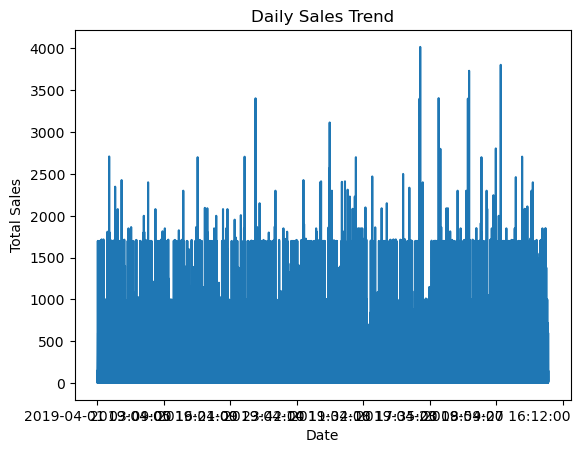

In [6]:
# visulization
import matplotlib.pyplot as plt

daily_sales.plot(
    title="Daily Sales Trend",
    xlabel="Date",
    ylabel="Total Sales"
)
plt.show()

***Interpretation***

The time-based aggregation reveals volatility, trends, and event-driven behavior, enabling operational planning and revenue forecasting.

### Analyst Reflection

**Which pivot was easiest to translate into pandas and why?**

The product revenue pivot was the easiest to translate because it follows a direct and intuitive mapping: grouping by product and aggregating total sales. The business logic is clear, and the technical implementation in pandas mirrors the Excel pivot structure closely.

**Which pivot required the most deliberate thinking?**

The customer frequency pivot required the most deliberate thinking because it measures purchase count rather than monetary value. This distinction is subtle but important, as it requires selecting a count-based aggregation (size) instead of summing sales, which is a common beginner pitfall.

**What mistake would a beginner most likely make when recreating pivots in code?**

A common beginner mistake is failing to sort the aggregated results after grouping. Without explicit sorting, the output may be technically correct but analytically misleading, as high-impact products or customers may not appear at the top of the results.

## Detecting Silent Analytical Errors

1. **Wrong Aggregation**

2. **Wrong denominator**

3. **Right math, wrong business meaning**

**Question A:**

Why would using `mean()` here be dangerous if a manager thinks this represents “product performance”?

In [7]:
df.groupby("Product")["Sales"].mean()

Product
20in Monitor                   111.407397
27in 4K Gaming Monitor         391.375400
27in FHD Monitor               150.604713
34in Ultrawide Monitor         381.746502
AA Batteries (4-pack)            5.252285
AAA Batteries (4-pack)           4.413595
Apple Airpods Headphones       150.994036
Bose SoundSport Headphones     100.616406
Flatscreen TV                  300.655022
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        16.104702
Macbook Pro Laptop            1707.538803
ThinkPad Laptop                999.990000
USB-C Charging Cable            13.048917
Vareebadd Phone                400.000000
Wired Headphones                13.107712
iPhone                         702.026049
Name: Sales, dtype: float64

This aggregation is misleading because it calculates the **average sales value per transaction**, not total revenue or total units sold. As a result, it does not reflect how much revenue a product actually generated or how strongly it performed in terms of demand. Using this metric to assess product performance could lead to incorrect conclusions, such as favoring high-priced but low-volume products over consistently strong sellers.

**Question B:**

Why does this look like “customer contribution” but actually misleads decision-makers?

In [ ]:
#df.groupby("Customer")["Sales"].sum()/df.groupby("Sales").sum()

This calculation appears to measure contribution or loyalty, but it is misleading because it only reflects **how frequently an entity appears in the dataset**, not how valuable that entity is in terms of spending behavior. As a result, it may overemphasize frequent low-value activity while underrepresenting fewer but higher-value purchases, leading to incorrect loyalty classifications and misallocated incentives.

**Question C:**

What question does this actually answer — and what question might someone incorrectly think it answers?

In [ ]:
df.groupby("Order Date")["Sales"].sum().mean()

This aggregation answers the question, *“What is the average daily revenue across the observed period?”* However, it can easily be misinterpreted as *“What is the daily revenue?”* This masks day-to-day variability and removes the temporal dynamics that are often critical for understanding trends, spikes, or operational issues.

## End of the week task
**Exercise 1:**

For each metric below, write one business insight.

Metric:
Product A generates 55% of total revenue.

Metric:
Customer purchase frequency is declining, but total revenue is flat.

Metric:
Weekday sales outperform weekends by 30%.

⚠️ Rules:

- Do not restate the metric.

- Use cause–effect language.

- One sentence each.

**Exercise 2: Choosing the RIGHT Aggregation**

For each business question, answer ONLY:

- Best aggregation

- Why (1 sentence)

**Questions**

Who are our most valuable customers?

Which product should we promote next month?

Is demand becoming unstable over time?

**Exercise 3: Executive Rewrite**

*Rewrite this insight for an executive:*

“From the dataset, Bob appears frequently and spends more than others, so he is a high-value customer.”

Rules:

- No “dataset”

- No “appears”

- No technical language

- Confidence, not hedging

**Exercise 4: Kill a Misleading Insight**

Here’s a technically correct but dangerous insight:

“Average order value increased by 20% this month.”

Your task:

- Explain why this could be misleading

- State one follow-up metric you would demand before acting

### Exercise 1: Translating Metrics into Business Insights

#### Product Revenue Concentration
**Metric:** Product A generates 55% of total revenue 

**Insight:** Product A’s revenue dominance is driven by pricing rather than volume, making total revenue highly sensitive to changes in demand for a single premium product.

#### Customer Purchasing Behavior
**Metric:** Customer purchase frequency is declining, but total revenue is flat 

**Insight:** Flat revenue despite declining purchase frequency indicates rising order values, but also signals growing dependence on fewer transactions, increasing long-term retention risk.

#### Time-Based Sales Patterns
**Metric:** Weekday sales outperform weekends by 30% 

**Insight:** Sales are driven primarily by routine, weekday purchasing behavior rather than discretionary weekend shopping.

---

#### Exercise 2: Selecting the Right Aggregation

| Business Question | Best Aggregation | Reason |
|------------------|-----------------|--------|
| Most valuable customers | Total revenue per customer | Value is defined by revenue contribution |
| Product to promote | Revenue + growth trend | Promotion targets potential, not weakness |
| Demand stability | Revenue over time | Reveals volatility and trend breaks |

---

#### Exercise 3: Executive Insight Rewrite

Bob is a high-value customer, combining above-average purchase frequency with total spending that significantly exceeds the customer baseline.

---

#### Exercise 4: Identifying Misleading Insights

**Risk:** Average order value can be skewed by outliers and does not guarantee higher profitability. 
 
**Follow-up Metric:** Profit margin per order


#### *Week 5 Conclusion - Aggregation, Pivots, and Business Judgment*

Week 5 focused on translating business questions into correct aggregations and interpreting the resulting metrics responsibly. Rather than treating grouped outputs and pivot tables as final answers, this week emphasized understanding what each aggregation actually represents and where it can be misleading.

Through customer, product, and time-based analyses, I learned how different grouping choices can lead to very different business conclusions. I also explored common analytical pitfalls, such as relying on averages without context, misinterpreting frequency as value, and assuming flat revenue implies stability.

Most importantly, this week reinforced that data analysis is not only about computing metrics but about evaluating their implications, limitations, and risks. Clear framing, appropriate aggregation, and business awareness are essential to ensure insights are accurate, actionable, and not misleading.

This foundation prepares me to move into visualization and storytelling, where these insights must be communicated clearly and responsibly.